# Discussion Related With Outliers And Impact On Machine Learning
Which Machine Learning Models Are Sensitive To Outliers

    Naivye Bayes Classifier--- Not Sensitive To Outliers
    SVM-------- Not Sensitive To Outliers
    Linear Regression---------- Sensitive To Outliers
    Logistic Regression------- Sensitive To Outliers
    Decision Tree Regressor or Classifier---- Not Sensitive
    Ensemble(RF,XGboost,GB)------- Not Sensitive
    KNN--------------------------- Not Sensitive
    Kmeans------------------------ Sensitive
    Hierarichal------------------- Sensitive
    PCA-------------------------- Sensitive
    Neural Networks-------------- Sensitive



In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\Imran\\Desktop\\titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

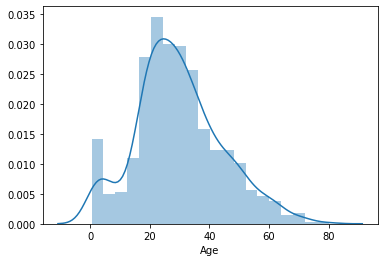

In [5]:
sns.distplot(data['Age'].dropna())

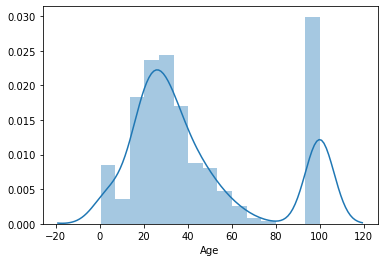

In [6]:
sns.distplot(data['Age'].fillna(100))

# Gaussian Distributed

Text(0, 0.5, 'Number of passenger')

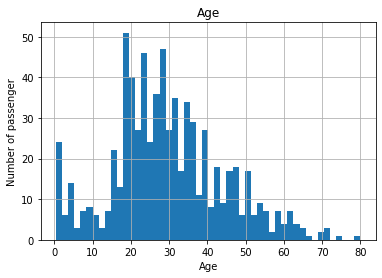

In [7]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of passenger')

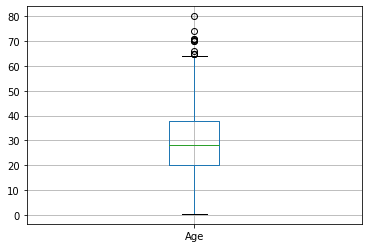

In [8]:
figure = data.boxplot(column='Age')

In [9]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# if The data is Normally Distributed we use this

In [10]:
# Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary=data['Age'].mean() + 3* data['Age'].std()
lower_boundary=data['Age'].mean() - 3* data['Age'].std()
print(lower_boundary)
print(uppper_boundary)
print(data['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


# If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'Number  of Passenger')

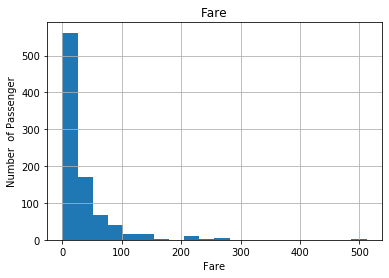

In [11]:
figure = data.Fare.hist(bins=20)
figure.set_title("Fare")
figure.set_xlabel('Fare')
figure.set_ylabel("Number  of Passenger")

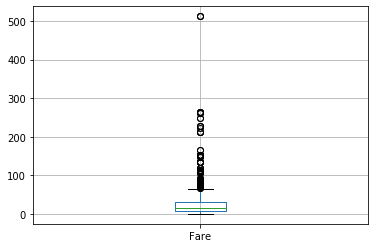

In [12]:
data.boxplot(column ='Fare')

In [13]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
# Lets compute the Interquantile range to calculate the boundaries
IQR = data.Fare.quantile(0.75)-data.Fare.quantile(0.25)

In [15]:
lower_bridge=data['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Fare'].quantile(0.25)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
42.5448


In [16]:
# Extreme outliers
lower_bridge=data['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=data['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [17]:
df = data.copy()

In [18]:
df.loc[df['Age']>=73,'Age']=73

In [19]:
df.loc[df['Fare']>=100,'Fare']=100

Text(0, 0.5, 'Number of passenger')

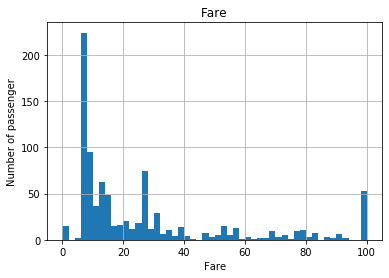

In [20]:
figure = df.Fare.hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("Number of passenger")

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6417910447761194
roc_auc_score: 0.6938945314741493


In [23]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier()
classifier1.fit(X_train,y_train)
y_pred=classifier1.predict(X_test)
y_pred1=classifier1.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6455223880597015
roc_auc_score: 0.6845125380157228


In [24]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)
y_pred1 = classifier2.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6716417910447762
roc_auc_score: 0.6662936822172492
